# 나눔고딕

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

# 프로젝트 시작!

In [2]:
# 필요한 클래스 임포트
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split 

# ******* 데이터 불러오기 ************
train = pd.read_csv('/content/drive/MyDrive/플레이데이터(머신러닝)/project/train.csv')
test = pd.read_csv('/content/drive/MyDrive/플레이데이터(머신러닝)/project/test.csv')

#********* 데이터 전처리 *************

# 오류 데이터 삭제
error_data = ['C2085', 'C1397', 'C2431', 'C1649', 'C1095', 'C2051', 'C1218', 'C1894', 'C2483', 'C1502', 'C1988']
for error in error_data:
    error_index = train[train['단지코드'] == error].index
    train.drop(error_index, inplace=True)

# for 중복값 제거
train = train.drop_duplicates()
test = test.drop_duplicates()

# for 아파트이면서 공공분양이 아닌 데이터만 사용
train = train[(train.임대건물구분 == '아파트') & (train.공급유형 != '공공분양')]
test = test[(test.임대건물구분 == '아파트') & (test.공급유형 != '공공분양')]


# 임대보증금과 임대료 타입 float로 변환
train.loc[train.임대보증금=='-', '임대보증금'] = np.nan
test.loc[test.임대보증금=='-','임대보증금' ] = np.nan

train['임대보증금'] = train['임대보증금'].astype(float)
test['임대보증금'] = test['임대보증금'].astype(float)

train.loc[train.임대료=='-', '임대료'] = np.nan
test.loc[test.임대료=='-', '임대료'] = np.nan

train['임대료'] = train['임대료'].astype(float)
test['임대료'] = test['임대료'].astype(float)

# 지하철역과 버스 정류장의 NULL값의 경우, 0으로 판단, 밑에서 컬럼명 바꿈(지하철, 버스)
train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].fillna(0, inplace=True)
train['도보 10분거리 내 버스정류장 수'].fillna(0, inplace=True)

test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].fillna(0, inplace=True)
test['도보 10분거리 내 버스정류장 수'].fillna(0, inplace=True)

# test의 자격유형에 있는 2개 결측치 채우기
test.loc[(test.단지코드=='C2411')&(test.자격유형.isnull()), '자격유형'] = 'A'
test.loc[(test.단지코드=='C2253')&(test.자격유형.isnull()), '자격유형'] = 'C'

# 공급유형이 장기전세면 임대료 = 0
train.loc[(train.공급유형=='장기전세')&(train.임대료.isnull()), '임대료']=0

# train 강원도 행복주택

# 전용면적 16.91 
train.loc[(train['단지코드'] == 'C1786') & (train['전용면적'] == 16.91), '임대보증금'] = 13450000
train.loc[(train['단지코드'] == 'C1786') & (train['전용면적'] == 16.91), '임대료'] = 65500
# 전용면적 26.9
train.loc[(train['단지코드'] == 'C1786') & (train['전용면적'] == 26.9), '임대보증금'] = 19700000
train.loc[(train['단지코드'] == 'C1786') & (train['전용면적'] == 26.9), '임대료'] = 96000
# 전용면적 26.9
train.loc[(train['단지코드'] == 'C1786') & (train['전용면적'] == 26.9), '임대보증금'] = 19150000
train.loc[(train['단지코드'] == 'C1786') & (train['전용면적'] == 26.9), '임대료'] = 94000
# 전용면적 26.9
train.loc[(train['단지코드'] == 'C1786') & (train['전용면적'] == 26.9), '임대보증금'] = 21400000
train.loc[(train['단지코드'] == 'C1786') & (train['전용면적'] == 26.9), '임대료'] = 105000

# train 부산 국민임대

# 전용면적 24.72
train.loc[(train['단지코드'] == 'C1326') & (train['전용면적'] == 24.72), '임대보증금'] = 7000000
train.loc[(train['단지코드'] == 'C1326') & (train['전용면적'] == 24.72), '임대료'] = 135000
# 전용면적 24.79
train.loc[(train['단지코드'] == 'C1326') & (train['전용면적'] == 24.79), '임대보증금'] = 7000000
train.loc[(train['단지코드'] == 'C1326') & (train['전용면적'] == 24.79), '임대료'] = 135000
# 전용면적 26.83
train.loc[(train['단지코드'] == 'C1326') & (train['전용면적'] == 26.83), '임대보증금'] = 7600000
train.loc[(train['단지코드'] == 'C1326') & (train['전용면적'] == 26.83), '임대료'] = 142000
# 전용면적 37.7
train.loc[(train['단지코드'] == 'C1326') & (train['전용면적'] == 37.7), '임대보증금'] = 14800000
train.loc[(train['단지코드'] == 'C1326') & (train['전용면적'] == 37.7), '임대료'] = 198000
# 전용면적 46.94
train.loc[(train['단지코드'] == 'C1326') & (train['전용면적'] == 46.94), '임대보증금'] = 23100000
train.loc[(train['단지코드'] == 'C1326') & (train['전용면적'] == 46.94), '임대료'] = 259000

# train 대구 국민임대

# 전용면적 29.17
train.loc[(train['단지코드'] == 'C2186') & (train['전용면적'] == 29.17), '임대보증금'] = 10847000
train.loc[(train['단지코드'] == 'C2186') & (train['전용면적'] == 29.17), '임대료'] = 138600
# 전용면적 29.34
train.loc[(train['단지코드'] == 'C2186') & (train['전용면적'] == 29.34), '임대보증금'] = 10847000
train.loc[(train['단지코드'] == 'C2186') & (train['전용면적'] == 29.34), '임대료'] = 138600
# 전용면적 37.43
train.loc[(train['단지코드'] == 'C2186') & (train['전용면적'] == 37.43), '임대보증금'] = 17338000
train.loc[(train['단지코드'] == 'C2186') & (train['전용면적'] == 37.43), '임대료'] = 197500

# test 대전 임대상가

# 전용면적 26.37
test.loc[(test['단지코드'] == 'C1006') & (test['전용면적'] == 26.37), '임대보증금'] = 5787000
test.loc[(test['단지코드'] == 'C1006') & (test['전용면적'] == 26.37), '임대료'] = 79980
test.loc[(test['단지코드'] == 'C1006') & (test['전용면적'] == 26.37), '자격유형'] = 'C'
# 전용면적 52.74
test.loc[(test['단지코드'] == 'C1006') & (test['전용면적'] == 52.74), '임대보증금'] = 11574000
test.loc[(test['단지코드'] == 'C1006') & (test['전용면적'] == 52.74), '임대료'] = 159960
test.loc[(test['단지코드'] == 'C1006') & (test['전용면적'] == 52.74), '자격유형'] = 'C'

# test 강원도 영구임대

# 전용면적 24.83
test.loc[(test['단지코드'] == 'C2152') & (test['전용면적'] == 24.83), '임대보증금'] = 2129000
test.loc[(test['단지코드'] == 'C2152') & (test['전용면적'] == 24.83), '임대료'] = 42350
# 전용면적 33.84
test.loc[(test['단지코드'] == 'C2152') & (test['전용면적'] == 33.84), '임대보증금'] = 2902000
test.loc[(test['단지코드'] == 'C2152') & (test['전용면적'] == 33.84), '임대료'] = 57730

# test 경상남도 행복주택

# 전용면적 16.94
test.loc[(test['단지코드'] == 'C1267') & (test['전용면적'] == 16.94), '임대보증금'] = 11200000
test.loc[(test['단지코드'] == 'C1267') & (test['전용면적'] == 16.94), '임대료'] = 53200
# 전용면적 26.85
test.loc[(test['단지코드'] == 'C1267') & (test['전용면적'] == 26.85), '임대보증금'] = 16333330
test.loc[(test['단지코드'] == 'C1267') & (test['전용면적'] == 26.85), '임대료'] = 77580
# 전용면적 26.85
test.loc[(test['단지코드'] == 'C1267') & (test['전용면적'] == 26.85), '임대보증금'] = 18620000
test.loc[(test['단지코드'] == 'C1267') & (test['전용면적'] == 26.85), '임대료'] = 88440
# 전용면적 36.77
test.loc[(test['단지코드'] == 'C1267') & (test['전용면적'] == 36.77), '임대보증금'] = 23760000
test.loc[(test['단지코드'] == 'C1267') & (test['전용면적'] == 36.77), '임대료'] = 112860



# 데이터프레임 컬럼명 변경(지하철어쩌구~ ->지하철, 버스 어쩌구~ -> 버스)
train.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형',
    '전용면적', '전용면적별세대수', '공가수', '자격유형', '임대보증금',
    '임대료', '지하철', '버스', '단지내주차면수', '등록차량수']
test.columns = [
    '단지코드', '총세대수', '임대건물구분', '지역', '공급유형',
    '전용면적', '전용면적별세대수', '공가수', '자격유형', '임대보증금',
    '임대료', '지하철', '버스', '단지내주차면수']

# 출력용
train2 = train.drop(labels='단지코드', axis=1)


dict = {'지역': train['지역'].unique(), '공급유형':train['공급유형'].unique(), '자격유형':train['자격유형'].unique()}
sh = pd.DataFrame.from_dict(dict, orient='index')


# 필요없는 칼럼 삭제(임대건물구분, 단지코드)
train = train.drop('임대건물구분',axis=1)
test = test.drop('임대건물구분',axis=1)    

# train 지역
train.insert(4, 'n지역','')
train.loc[(train['지역'] == '강원도') | (train['지역'] == '제주특별자치도') | (train['지역'] == '충청남도') | (train['지역'] == '울산광역시'), 'n지역'] = 0
train.loc[(train['지역'] == '전라남도') | (train['지역'] == '전라북도') | (train['지역'] == '경상남도'), 'n지역'] = 1
train.loc[(train['지역'] == '부산광역시') | (train['지역'] == '충청북도') | (train['지역'] == '경상북도'), 'n지역'] = 2
train.loc[(train['지역'] == '대전광역시') | (train['지역'] == '광주광역시') | (train['지역'] == '대구광역시'), 'n지역'] = 3
train.loc[(train['지역'] == '경기도') | (train['지역'] == '대구광역시') | (train['지역'] == '세종특별자치시'), 'n지역'] = 4

# test 지역
test.insert(4, 'n지역','')
test.loc[(test['지역'] == '강원도') | (test['지역'] == '제주특별자치도') | (test['지역'] == '충청남도') | (test['지역'] == '울산광역시'), 'n지역'] = 0
test.loc[(test['지역'] == '전라남도') | (test['지역'] == '전라북도') | (test['지역'] == '경상남도'), 'n지역'] = 1
test.loc[(test['지역'] == '부산광역시') | (test['지역'] == '충청북도') | (test['지역'] == '경상북도'), 'n지역'] = 2
test.loc[(test['지역'] == '대전광역시') | (test['지역'] == '광주광역시') | (test['지역'] == '대구광역시'), 'n지역'] = 3
test.loc[(test['지역'] == '경기도') | (test['지역'] == '대구광역시') | (test['지역'] == '세종특별자치시'), 'n지역'] = 4


train = train.drop(labels='지역', axis=1)
test = test.drop(labels='지역', axis=1)
# test['n지역'] = test['n지역'].astype('category')

# train 자격유형
train.loc[train['자격유형'].isin(['E','H','I','J']),'자격유형그룹'] = 'q1'
train.loc[train['자격유형'].isin(['B','L']),'자격유형그룹'] = 'q2'
train.loc[train['자격유형'].isin(['G','K','M','N','O']),'자격유형그룹'] = 'q3'
train.loc[train['자격유형'].isin(['D','C','F']),'자격유형그룹'] = 'q4'
train.loc[train['자격유형'].isin(['A']),'자격유형그룹'] = 'q5'

# test 자격유형
test.loc[test['자격유형'].isin(['E','H','I','J']),'자격유형그룹'] = 'q1'
test.loc[test['자격유형'].isin(['B','L']),'자격유형그룹'] = 'q2'
test.loc[test['자격유형'].isin(['G','K','M','N','O']),'자격유형그룹'] = 'q3'
test.loc[test['자격유형'].isin(['D','C','F']),'자격유형그룹'] = 'q4'
test.loc[test['자격유형'].isin(['A']),'자격유형그룹'] = 'q5'

train = train.drop(labels='자격유형', axis=1)
test = test.drop(labels='자격유형', axis=1)

# 공급유형 별로 임대유형, 임대기간, 입주조건 등이 상이함 → 차량 보유 여부를 비롯한 사회경제적지위(SES)를 반영할 것으로 예상
# 공급유형 별 특성과 '등록차량수-단지내주차면수' 차이 분포를 고려하여 범주 분류
# 국민임대(가장 많은 공급유형)와 임대상가(아파트와 명확한 임대유형 차이)는 별도의 범주로 분류

train.loc[train['공급유형'].isin(['공공임대(50년)']),'공급유형'] = '장기공공임대'
train.loc[train['공급유형'].isin(['공공임대(5년)', '공공임대(10년)', '공공임대(분납)']),'공급유형'] = '단기공공임대'
train.loc[train['공급유형'].isin(['행복주택', '영구임대', '장기전세']), '공급유형'] = '저소득층'
train.loc[train['공급유형'].isin(['국민임대']), '공급유형'] = '국민임대'

test.loc[test['공급유형'].isin(['공공임대(50년)']),'공급유형'] = '장기공공임대'
test.loc[test['공급유형'].isin(['공공임대(5년)', '공공임대(10년)', '공공임대(분납)']),'공급유형'] = '단기공공임대'
test.loc[test['공급유형'].isin(['행복주택', '영구임대', '장기전세']), '공급유형'] = '저소득층'
test.loc[test['공급유형'].isin(['국민임대']), '공급유형'] = '국민임대'

train['공급유형그룹'] = train.loc[:,'공급유형'].astype('category').cat.codes
test['공급유형그룹'] = test.loc[:,'공급유형'].astype('category').cat.codes


# 공급유형 컬럼 삭제
train = train.drop(labels='공급유형', axis=1)
test = test.drop(labels='공급유형', axis=1)

# train, test의 인덱스 번호 수정하기
train.reset_index(drop=False, inplace=True)
test.reset_index(drop=False, inplace=True)

# 단지만 따로 code 변수에 저장
code_test = test[['단지코드']]
code_train = train[['단지코드']]

code_test = np.array(code_test).reshape(-1,)
code_train = np.array(code_train).reshape(-1,)

# 숫자로 된 칼럼들만 따로 data 변수에 저장
data = train[['총세대수', '전용면적', '전용면적별세대수', '공가수', '임대보증금', '임대료', '지하철', '버스',
       '단지내주차면수', '등록차량수']]

# 원-핫 인코딩 직전 자료
before_train = train.drop(labels='index', axis=1)

# 원-핫 인코딩
train = pd.get_dummies(train, columns = ['n지역','공급유형그룹','자격유형그룹'])
test =  pd.get_dummies(test, columns = ['n지역','공급유형그룹','자격유형그룹'])

# 인덱스열 삭제, train에서서 등록차량수 마지막으로 빼기
train = train[[ '총세대수', '전용면적', '전용면적별세대수', '공가수', '임대보증금', '임대료', '지하철', '버스',
       '단지내주차면수', 'n지역_0', 'n지역_1', 'n지역_2', 'n지역_3', 'n지역_4',
       '공급유형그룹_0', '공급유형그룹_1', '공급유형그룹_2', '공급유형그룹_3', '자격유형그룹_q1', '자격유형그룹_q2',
       '자격유형그룹_q3', '자격유형그룹_q4', '자격유형그룹_q5', '등록차량수']]
test = test[[ '총세대수', '전용면적', '전용면적별세대수', '공가수', '임대보증금', '임대료', '지하철', '버스',
       '단지내주차면수', 'n지역_0', 'n지역_1', 'n지역_2', 'n지역_3', 'n지역_4',
       '공급유형그룹_0', '공급유형그룹_1', '공급유형그룹_2', '공급유형그룹_3', '자격유형그룹_q1', '자격유형그룹_q2',
       '자격유형그룹_q3', '자격유형그룹_q4', '자격유형그룹_q5']]

# input과 target 지정<< 하기전에 훈련,테스트 칼럼을 맞춰야됨, 따라서 훈련,테스트 칼럼을 카테고리별로 묶음 
data_input = train.drop(columns=['등록차량수'])
target = train['등록차량수']

# train세트와 test세트로 나누기
train_input, test_input, train_target, test_target = train_test_split(data_input, target, test_size=0.2, random_state=42)



/usr/local/lib/python3.9/dist-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [3]:
from sklearn.model_selection import train_test_split

sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target, test_size=0.1, random_state=42)

# 시각화

In [4]:
sh = sh.fillna("")
sh.T

,지역,공급유형,자격유형
0,경상남도,국민임대,A
1,대전광역시,공공임대(50년),B
2,경기도,영구임대,C
3,전라북도,공공임대(10년),E
4,강원도,공공임대(분납),F
5,광주광역시,장기전세,G
6,충청남도,행복주택,H
7,부산광역시,공공임대(5년),I
8,제주특별자치도,,J
9,울산광역시,,K


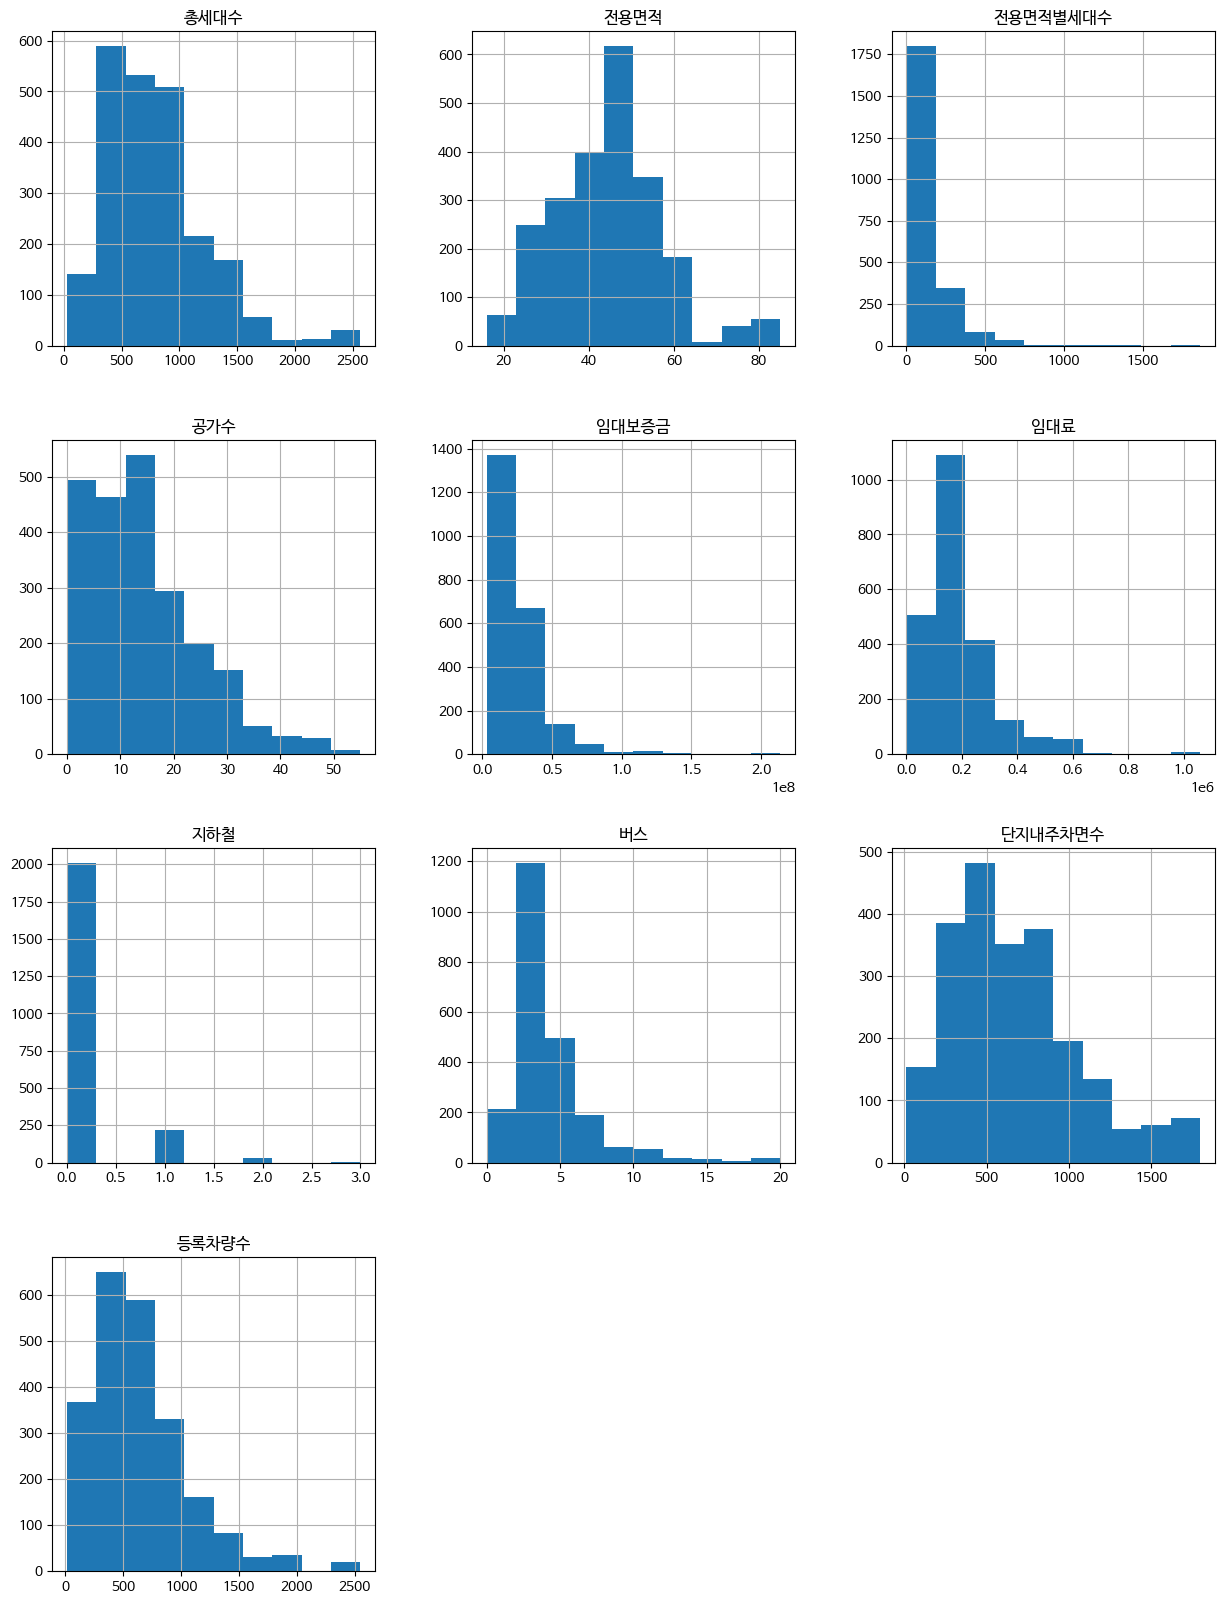

In [5]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

data.hist(figsize=(15, 20))
plt.show()

array([[<Axes: title={'center': '총세대수'}>]], dtype=object)

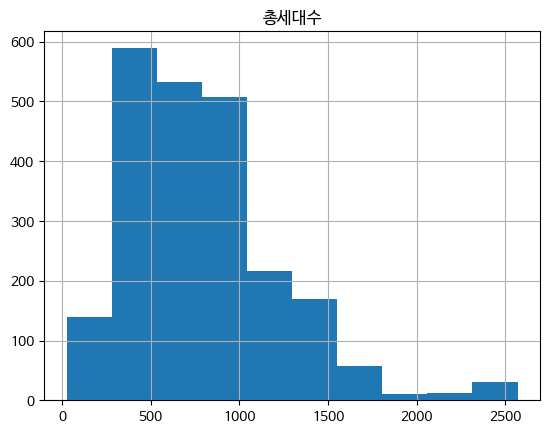

In [6]:
data.hist(column='총세대수')

array([[<Axes: title={'center': '전용면적'}>]], dtype=object)

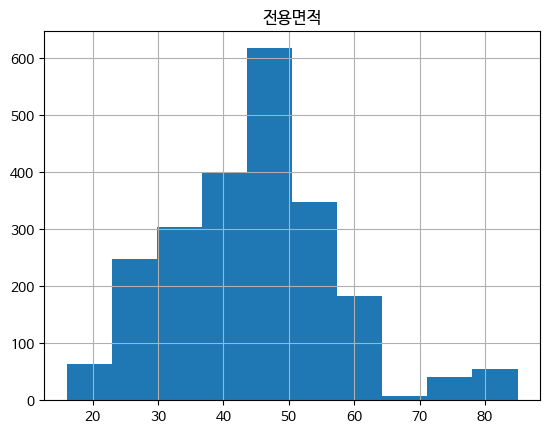

In [7]:
data.hist(column='전용면적')

array([[<Axes: title={'center': '전용면적별세대수'}>]], dtype=object)

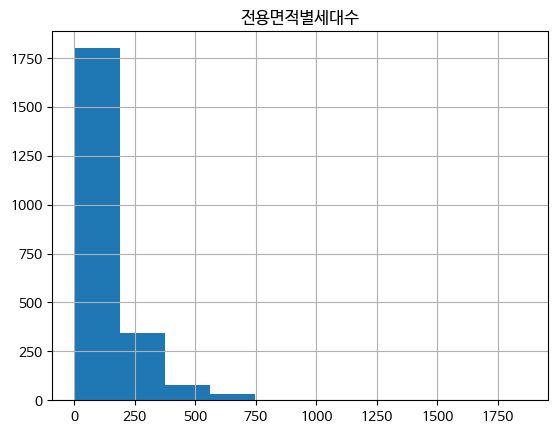

In [8]:
data.hist(column='전용면적별세대수')

array([[<Axes: title={'center': '공가수'}>]], dtype=object)

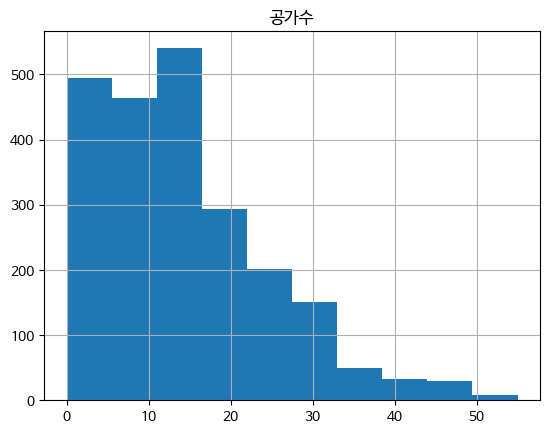

In [9]:
data.hist(column='공가수')

array([[<Axes: title={'center': '임대보증금'}>]], dtype=object)

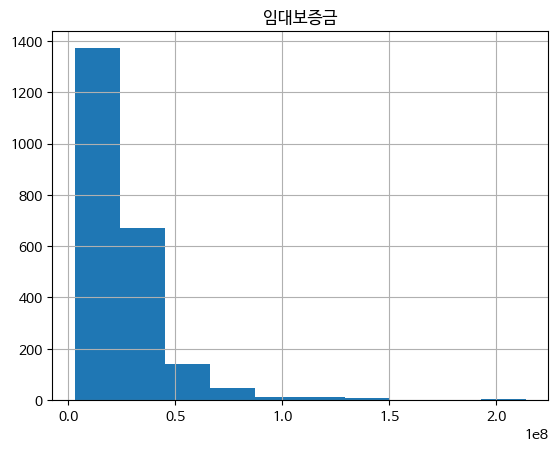

In [10]:
data.hist(column='임대보증금')

array([[<Axes: title={'center': '임대료'}>]], dtype=object)

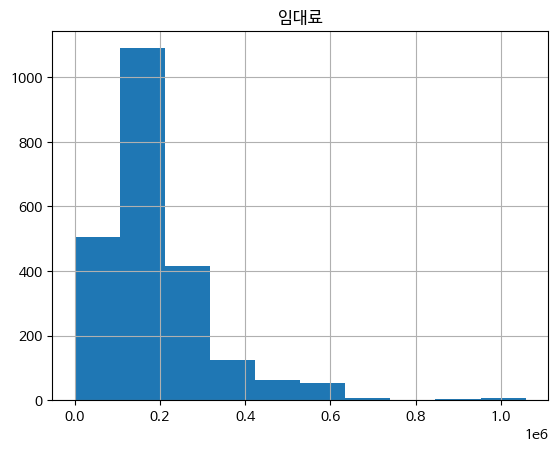

In [11]:
data.hist(column='임대료')

array([[<Axes: title={'center': '지하철'}>]], dtype=object)

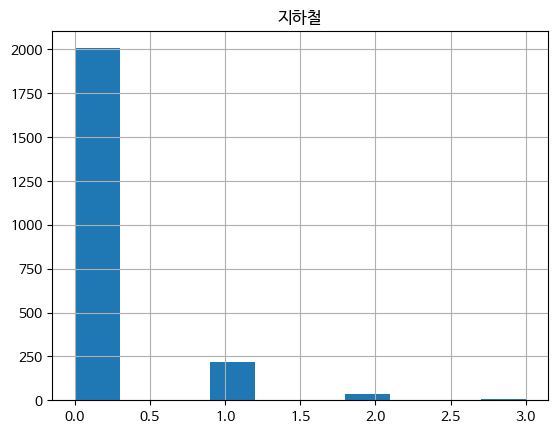

In [12]:
data.hist(column='지하철')

array([[<Axes: title={'center': '버스'}>]], dtype=object)

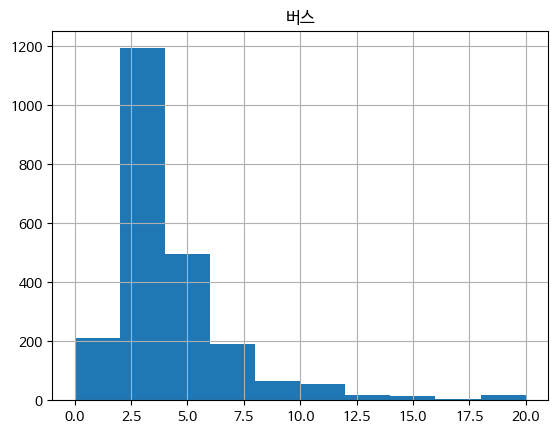

In [13]:
data.hist(column='버스')

array([[<Axes: title={'center': '단지내주차면수'}>]], dtype=object)

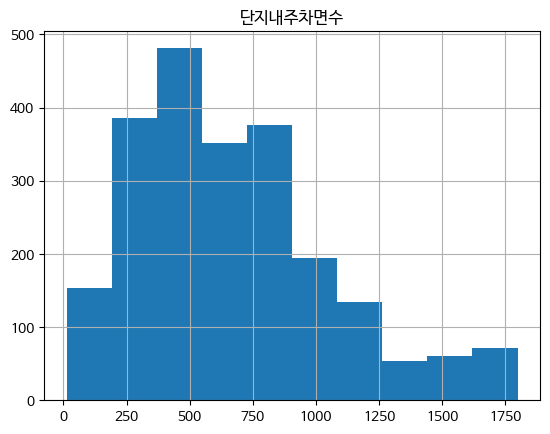

In [14]:
data.hist(column='단지내주차면수')

array([[<Axes: title={'center': '등록차량수'}>]], dtype=object)

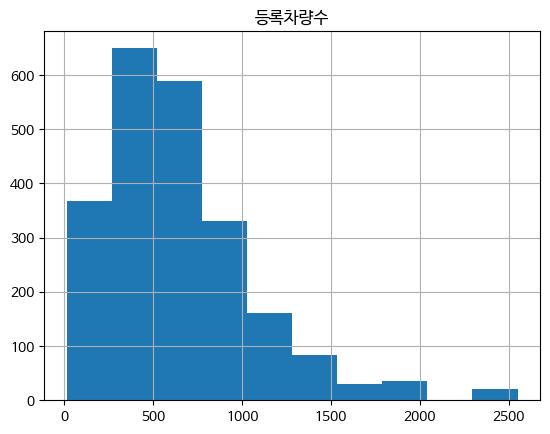

In [15]:
data.hist(column='등록차량수')

상관관계 파악하기

array([[<Axes: xlabel='총세대수', ylabel='총세대수'>,
        <Axes: xlabel='전용면적', ylabel='총세대수'>,
        <Axes: xlabel='전용면적별세대수', ylabel='총세대수'>,
        <Axes: xlabel='공가수', ylabel='총세대수'>,
        <Axes: xlabel='임대보증금', ylabel='총세대수'>,
        <Axes: xlabel='임대료', ylabel='총세대수'>,
        <Axes: xlabel='지하철', ylabel='총세대수'>,
        <Axes: xlabel='버스', ylabel='총세대수'>,
        <Axes: xlabel='단지내주차면수', ylabel='총세대수'>,
        <Axes: xlabel='등록차량수', ylabel='총세대수'>],
       [<Axes: xlabel='총세대수', ylabel='전용면적'>,
        <Axes: xlabel='전용면적', ylabel='전용면적'>,
        <Axes: xlabel='전용면적별세대수', ylabel='전용면적'>,
        <Axes: xlabel='공가수', ylabel='전용면적'>,
        <Axes: xlabel='임대보증금', ylabel='전용면적'>,
        <Axes: xlabel='임대료', ylabel='전용면적'>,
        <Axes: xlabel='지하철', ylabel='전용면적'>,
        <Axes: xlabel='버스', ylabel='전용면적'>,
        <Axes: xlabel='단지내주차면수', ylabel='전용면적'>,
        <Axes: xlabel='등록차량수', ylabel='전용면적'>],
       [<Axes: xlabel='총세대수', ylabel='전용면적별세대수'>,
        <Axes: xlabe

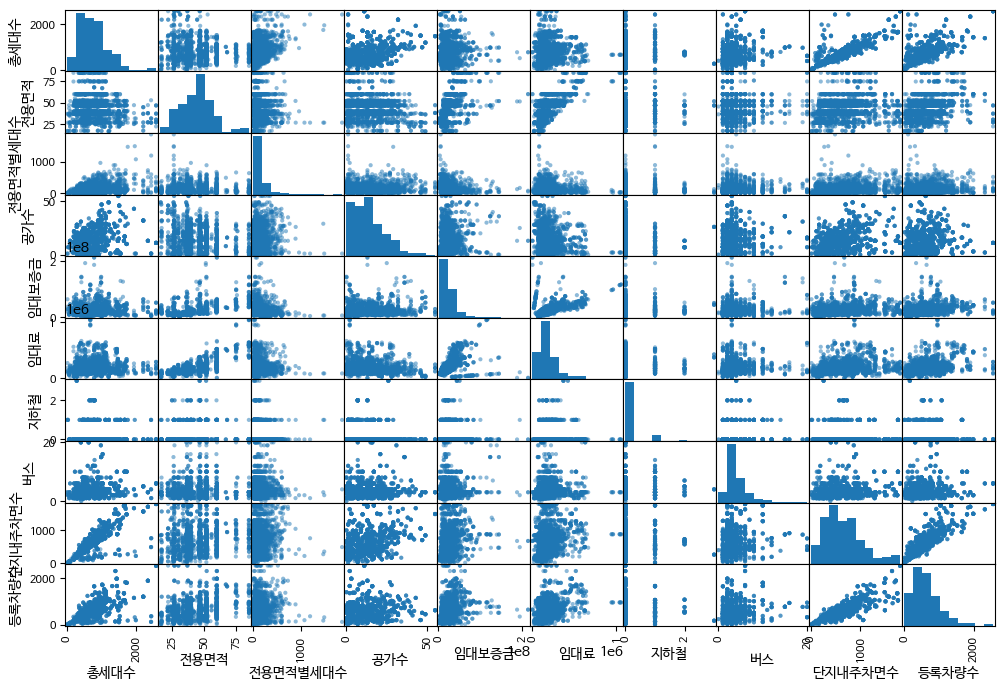

In [16]:
from pandas.plotting import scatter_matrix

plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기
scatter_matrix(data, figsize=(12, 8))

In [17]:
corr_matrix = before_train.corr()
corr_matrix["등록차량수"].sort_values(ascending=False)

등록차량수       1.000000
단지내주차면수     0.835166
총세대수        0.675567
임대료         0.412777
전용면적        0.308416
임대보증금       0.269635
버스          0.123826
전용면적별세대수    0.108905
공가수         0.053182
지하철        -0.007451
공급유형그룹     -0.189839
Name: 등록차량수, dtype: float64

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='총세대수', ylabel='등록차량수'>

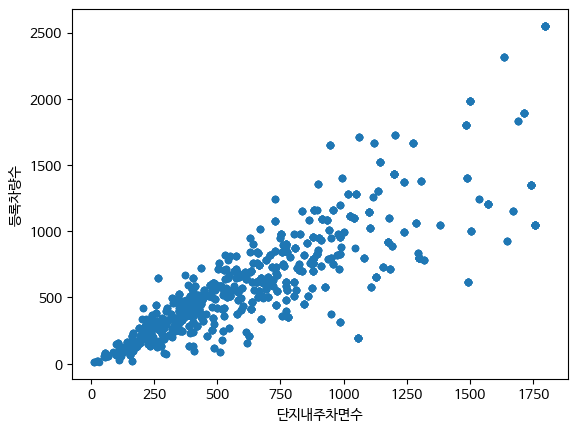

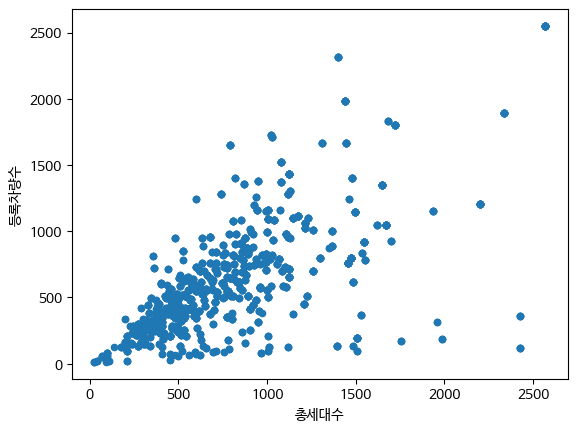

In [18]:
data.plot(kind='scatter', x='단지내주차면수', y='등록차량수')
data.plot(kind='scatter', x='총세대수', y='등록차량수')

# 다중선형모델

In [19]:
# 등록차량수와 상관관계가 가장 높은 5개의 숫자로 이루어진 데이터(단지내주차면수, 총세대수, 임대료, 전용면적, 임대보증금)와 지역, 공급유형, 자격유형만 가지고 있는 데이터 X_train, X_test 

X_train = train_input[['단지내주차면수', '총세대수', '임대료', '전용면적', '임대보증금', 'n지역_0', 'n지역_1', 'n지역_2', 'n지역_3', 'n지역_4', '공급유형그룹_0',
       '공급유형그룹_1', '공급유형그룹_2', '공급유형그룹_3', '자격유형그룹_q1', '자격유형그룹_q2',
       '자격유형그룹_q3', '자격유형그룹_q4', '자격유형그룹_q5']]
X_test = test_input[['단지내주차면수', '총세대수', '임대료', '전용면적', '임대보증금', 'n지역_0', 'n지역_1', 'n지역_2', 'n지역_3', 'n지역_4', '공급유형그룹_0',
       '공급유형그룹_1', '공급유형그룹_2', '공급유형그룹_3', '자격유형그룹_q1', '자격유형그룹_q2',
       '자격유형그룹_q3', '자격유형그룹_q4', '자격유형그룹_q5']]

In [20]:
from sklearn.preprocessing import StandardScaler

# 데이터 표준화시키기
scaler=StandardScaler()
scaler.fit(train_input)
train_scaled = scaler.transform(train_input)
test_scaled = scaler.transform(test_input)

In [21]:
from sklearn.linear_model import LinearRegression

# 등록차량수와 상관관계 높은 데이터로만 이루어진 X_train과 X_test로 선형회귀 훈련
model1 = LinearRegression()
model1.fit(X_train, train_target)
print(model1.score(X_train, train_target))
print(model1.score(X_test, test_target))

0.7731701460248743
0.7859826128556857


In [22]:
# 원래 데이터인 train_input과 test_input 데이터를  사용하여 선형회귀 모델 훈련

model2 = LinearRegression()
model2.fit(train_input, train_target)
print(model2.score(train_input, train_target))
print(model2.score(test_input, test_target))

0.7923426462064652
0.8014938349571348


In [23]:
# 표준화된 데이터로 선형회귀 훈련시키기 

model3 = LinearRegression()
model3.fit(train_scaled, train_target)
print(model3.score(train_scaled, train_target))
print(model3.score(test_scaled, test_target))

0.7923426462064652
0.801493834957222


상관관계 높은 데이터 5개만 사용한 모델보다 원래의 데이터의 훈련 점수가 훨씬 높음      
=> 총세대수와 단지내주차면수 두 변수 사이의 상관관계가 높아 다중공선성의 문제가 발생            
=> 모든 데이터를 사용하여 훈련시키는 것이 더 효과적!             
=> 다만 모델이 너무 단순하여 과소적합 문제가 발생            
=> 선형 방정식의 차수를 높여서 과소 적합을 해결하려 함          

## 과소적합을 해결하기 위해 조금더 복잡한 모델 생성 => 다항회귀

In [24]:
# 모델의 점수를 가장 최고로 만들 수 있는 train_poly의 차수 알아보기 
# 2차일 때 가장 점수가 높음 
from sklearn.preprocessing import PolynomialFeatures

degrees = [2, 3, 4, 5]
for degree in degrees :
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    train_poly = poly.fit_transform(train_input)
    test_poly = poly.fit_transform(test_input)

    model = LinearRegression()
    model.fit(train_poly, train_target)
    print('--------------------------------')
    print("poly의 차수 : {}".format(degree))
    print("train의 score: ",model.score(train_poly, train_target))
    print("test의 score: ",model.score(test_poly, test_target))

--------------------------------
poly의 차수 : 2
train의 score:  0.8879938904446129
test의 score:  0.8652375162677343
--------------------------------
poly의 차수 : 3
train의 score:  0.8015063765205733
test의 score:  0.6599376874620694
--------------------------------
poly의 차수 : 4
train의 score:  0.78577611216958
test의 score:  0.4454193002580499
--------------------------------
poly의 차수 : 5
train의 score:  0.13362917241081418
test의 score:  -17.349734121623754


In [25]:

# 차수 높이기 
poly = PolynomialFeatures(degree=2, include_bias=False)
train_poly = poly.fit_transform(train_input)
test_poly = poly.fit_transform(test_input)

In [26]:
from sklearn.linear_model import LinearRegression

# 차수를 높인 train_poly, test_poly로 선형회귀 훈련 
model4 = LinearRegression()
model4.fit(train_poly, train_target)

print(model4.score(train_poly, train_target))
print(model4.score(test_poly, test_target))

0.8879938904446129
0.8652375162677343


In [27]:
# 훈련 에러(mean absolute error) 확인하기
from sklearn.metrics import mean_absolute_error

train_pred = model4.predict(train_poly)
mae_train = mean_absolute_error(train_target, train_pred)

test_pred = model4.predict(test_poly)
mae_test = mean_absolute_error(test_target, test_pred)

print(f'훈련 에러: {mae_train:.2f}')
print(f'테스트 에러: {mae_test:.2f}')

훈련 에러: 102.62
테스트 에러: 108.52


# 딥러닝 (선형회귀)  - 실패

In [28]:
from tensorflow import keras

m = keras.models.Sequential()
m.add(keras.layers.Dense(1, input_shape=(23,), activation='linear'))
m.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
m.fit(train_input, train_target, epochs=100)

Epoch 1/100
57/57 [==============================] - 1s 2ms/step - loss: 3936774.2500 - accuracy: 0.0000e+00
Epoch 2/100
57/57 [==============================] - 0s 1ms/step - loss: 2448948.2500 - accuracy: 0.0000e+00
Epoch 3/100
57/57 [==============================] - 0s 1ms/step - loss: 960566.9375 - accuracy: 0.0000e+00
Epoch 4/100
57/57 [==============================] - 0s 2ms/step - loss: 39553.0586 - accuracy: 0.0000e+00
Epoch 5/100
57/57 [==============================] - 0s 2ms/step - loss: 7909.3794 - accuracy: 0.0000e+00
Epoch 6/100
57/57 [==============================] - 0s 2ms/step - loss: 6350.3022 - accuracy: 0.0000e+00
Epoch 7/100
57/57 [==============================] - 0s 2ms/step - loss: 5332.6270 - accuracy: 0.0000e+00
Epoch 8/100
57/57 [==============================] - 0s 2ms/step - loss: 3420.0610 - accuracy: 0.0000e+00
Epoch 9/100
57/57 [==============================] - 0s 2ms/step - loss: 2195.4519 - accuracy: 0.0000e+00
Epoch 10/100
57/57 [=================

In [29]:
m.fit(train_input, train_target, epochs=100)

Epoch 1/100
57/57 [==============================] - 0s 2ms/step - loss: 1778.8165 - accuracy: 0.0000e+00
Epoch 2/100
57/57 [==============================] - 0s 2ms/step - loss: 3227.0938 - accuracy: 0.0000e+00
Epoch 3/100
57/57 [==============================] - 0s 2ms/step - loss: 2798.1047 - accuracy: 0.0000e+00
Epoch 4/100
57/57 [==============================] - 0s 2ms/step - loss: 2904.1865 - accuracy: 0.0000e+00
Epoch 5/100
57/57 [==============================] - 0s 2ms/step - loss: 2445.0022 - accuracy: 0.0000e+00
Epoch 6/100
57/57 [==============================] - 0s 2ms/step - loss: 2524.6565 - accuracy: 0.0000e+00
Epoch 7/100
57/57 [==============================] - 0s 2ms/step - loss: 2116.6426 - accuracy: 0.0000e+00
Epoch 8/100
57/57 [==============================] - 0s 2ms/step - loss: 3790.0410 - accuracy: 0.0000e+00
Epoch 9/100
57/57 [==============================] - 0s 2ms/step - loss: 1655.8792 - accuracy: 0.0000e+00
Epoch 10/100
57/57 [==========================

In [30]:
history = m.fit(train_input, train_target, epochs=100)

Epoch 1/100
57/57 [==============================] - 0s 1ms/step - loss: 3011.9600 - accuracy: 0.0000e+00
Epoch 2/100
57/57 [==============================] - 0s 1ms/step - loss: 3748.2588 - accuracy: 0.0000e+00
Epoch 3/100
57/57 [==============================] - 0s 1ms/step - loss: 4004.4993 - accuracy: 0.0000e+00
Epoch 4/100
57/57 [==============================] - 0s 2ms/step - loss: 1355.3846 - accuracy: 0.0000e+00
Epoch 5/100
57/57 [==============================] - 0s 1ms/step - loss: 3989.3806 - accuracy: 0.0000e+00
Epoch 6/100
57/57 [==============================] - 0s 1ms/step - loss: 2087.2202 - accuracy: 0.0000e+00
Epoch 7/100
57/57 [==============================] - 0s 2ms/step - loss: 3598.6897 - accuracy: 0.0000e+00
Epoch 8/100
57/57 [==============================] - 0s 1ms/step - loss: 1797.8546 - accuracy: 0.0000e+00
Epoch 9/100
57/57 [==============================] - 0s 2ms/step - loss: 1873.6711 - accuracy: 0.0000e+00
Epoch 10/100
57/57 [==========================

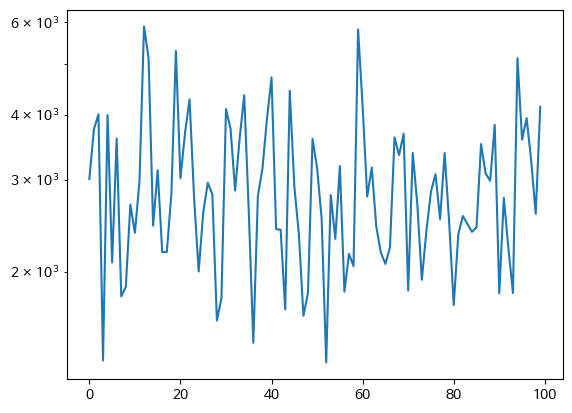

In [31]:
import  matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.yscale('log')
plt.show()